In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\car data (1).csv")

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [12]:
data.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
data.shape

(301, 9)

In [17]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

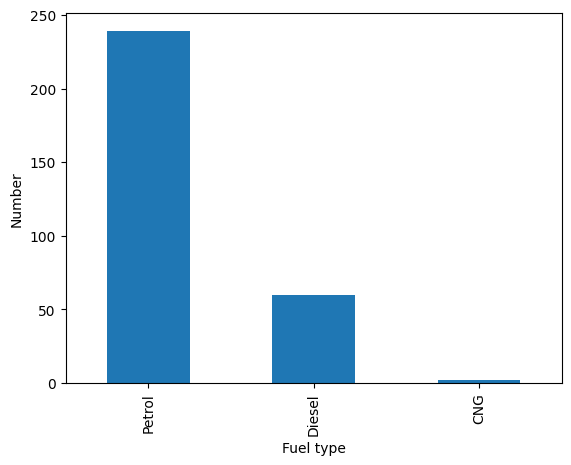

In [22]:
gra= data["Fuel_Type"].value_counts().plot.bar()
plt.xlabel("Fuel type")
plt.ylabel("Number");

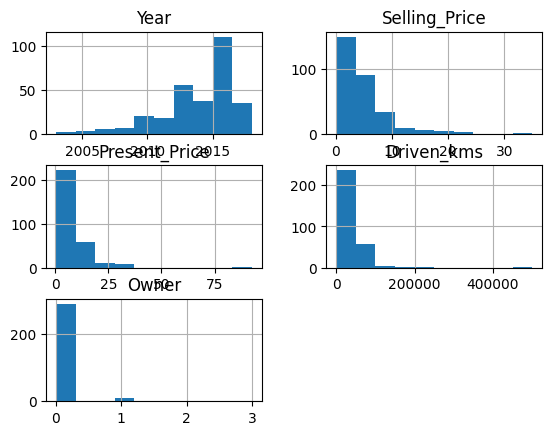

In [24]:
data.hist();

In [143]:

df = pd.get_dummies(data, drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,True,False,False,True


In [144]:
df["CNG"]=df["CNG"].astype(int)
df["Diesel"]=df["Diesel"].astype(int)
df["Petrol"]=df["Petrol"].astype(int)
df["Selling_type_Individual"]=df["Selling_type_Individual"].astype(int)
df["Transmission_Manual"]=df["Transmission_Manual"].astype(int)

In [128]:
from sklearn.model_selection import train_test_split

X=df.drop("Selling_Price",axis=1)
Y=df["Selling_Price"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [129]:
x_train

,Year,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Selling_type_Individual,Transmission_Manual
289,2016,13.60,10980,0,0,0,1,0,1
100,2016,1.90,3000,0,0,0,1,1,1
116,2013,1.47,33000,0,0,0,1,1,1
13,2015,7.71,26000,0,0,0,1,0,1
239,2012,4.43,23709,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
31,2011,4.89,54200,0,0,0,1,0,1
168,2013,0.73,12000,0,0,0,1,1,1
241,2015,7.13,35866,1,0,0,1,0,1
90,2009,18.61,62000,0,0,0,1,0,1


In [130]:
x_test

,Year,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Selling_type_Individual,Transmission_Manual
210,2012,4.60,35775,0,0,0,1,0,1
104,2017,1.47,4100,0,0,0,1,1,1
267,2016,9.40,19434,0,0,1,0,0,1
261,2016,5.97,5600,0,0,0,1,0,1
57,2010,18.54,50000,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
71,2011,12.48,45000,0,0,1,0,0,1
35,2011,7.74,49998,0,1,0,0,0,1
222,2014,7.60,77632,0,0,1,0,0,1
132,2017,0.95,3500,0,0,0,1,1,1


In [131]:
y_test

210    3.10
104    1.35
267    8.35
261    5.50
57     4.75
       ... 
71     4.50
35     2.95
222    6.00
132    0.75
238    4.80
Name: Selling_Price, Length: 61, dtype: float64

In [132]:
y_train

289    10.11
100     1.75
116     1.10
13      6.10
239     2.00
       ...  
31      2.35
168     0.42
241     4.75
90      3.80
248     4.00
Name: Selling_Price, Length: 240, dtype: float64

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
df.head(3)

,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,0,1


In [135]:

df.corr()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Selling_type_Individual,Transmission_Manual
Year,1.000000,0.236141,-0.047192,-0.524342,-0.182104,-0.017790,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878914,0.029187,-0.088344,-0.025164,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047192,0.878914,1.000000,0.203618,0.008058,-0.011502,0.473390,-0.465326,-0.512121,-0.348776
Driven_kms,-0.524342,0.029187,0.203618,1.000000,0.089216,0.012223,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008058,0.089216,1.000000,-0.014272,-0.053469,0.055687,0.124269,-0.050316
CNG,-0.017790,-0.025164,-0.011502,0.012223,-0.014272,1.000000,-0.040808,-0.160577,-0.060300,0.032018
Diesel,0.064315,0.552339,0.473390,0.172515,-0.053469,-0.040808,1.000000,-0.979648,-0.350467,-0.098643
Petrol,-0.059959,-0.540571,-0.465326,-0.172874,0.055687,-0.160577,-0.979648,1.000000,0.358321,0.091013
Selling_type_Individual,-0.039896,-0.550724,-0.512121,-0.101419,0.124269,-0.060300,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,0.000394,-0.367128,-0.348776,-0.162510,-0.050316,0.032018,-0.098643,0.091013,0.063240,1.000000


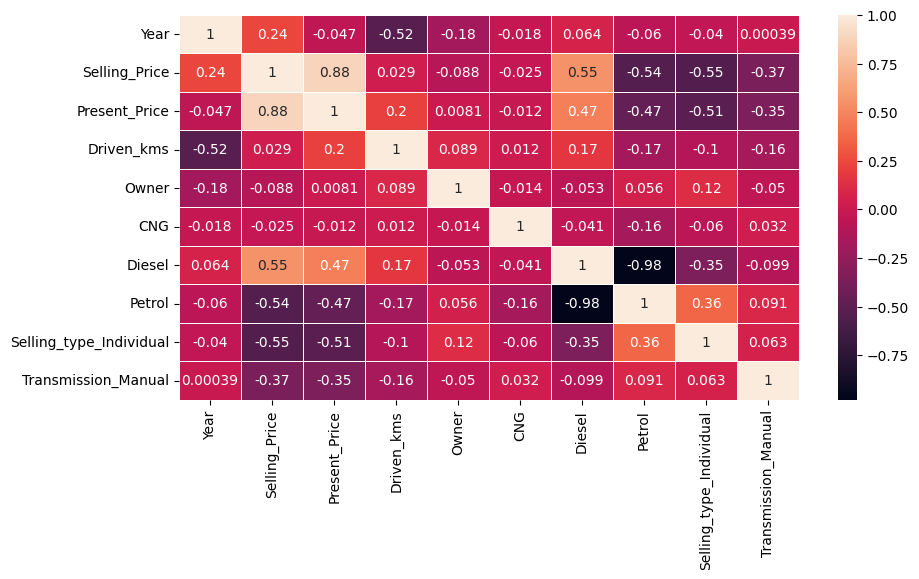

In [136]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(10,5))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5);

In [138]:
df.head(3)


,Year,Selling_Price,Present_Price,Driven_kms,Owner,CNG,Diesel,Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,1,0,1
1,2013,4.75,9.54,43000,0,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,1,0,1


In [140]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [142]:
model.score(x_train,y_train)

0.889256857214841

# Confusion matrix

In [147]:
# Make predictions with tuned model
y_preds = model.predict(x_test)
y_preds

array([ 2.43034101,  2.31029166,  7.90295408,  4.79989499,  8.54938313,
        2.49109033,  1.00474123, -1.7451668 ,  0.51670739, 22.40925656,
        1.92069687,  6.30059236,  1.64119178,  6.08112167,  2.9753905 ,
        8.50983297,  0.77236753,  0.55431541,  2.50830395, -0.25268762,
        2.12824111,  2.46557654,  1.03300821,  7.15364217, -0.3169635 ,
        0.93026223,  5.06664943,  4.30628967, 46.8203357 ,  0.85894597,
       -0.98184648,  1.18446267,  4.72928703,  2.07592818,  4.913365  ,
        3.33122762, 10.07646977,  6.25350504, -0.70642266, 14.38212373,
        6.31398995,  4.870064  ,  5.1737941 ,  1.82033795,  3.99173888,
        1.71988402,  2.14969368,  1.86733466,  9.77620872,  8.46143996,
        2.89607993, 18.65306124, 11.5393496 ,  1.81813416,  7.63126511,
        4.0995839 ,  7.40252615,  2.9766522 ,  5.91435366,  2.054219  ,
        5.06365746])